Import the required packages

In [1]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt

Make plots grayscale and display inline. Fix random seed.

In [2]:
%matplotlib inline
plt.rcParams['image.cmap'] = 'gray'
np.random.seed(seed=485)

Create a custom plot fn for matrix data. pyplot's built in "matshow" will not let us tile multiple images.

In [3]:
def plot_image(image):
    nr, nc = image.size() 
    extent = [-0.5, nc-0.5, nr-0.5, -0.5] 
    plt.imshow(image.numpy(), extent=extent, origin='upper', interpolation='nearest') 

Download MNIST data or load it if already downloaded

In [4]:
mnist_train = torchvision.datasets.MNIST(root='data', train=True, download=True) # train data only

Check the data shape

In [5]:
print("Data shape: {}".format(mnist_train.train_data.size()))
print("Labels shape: {}".format(mnist_train.train_labels.size()))

Data shape: torch.Size([60000, 28, 28])
Labels shape: torch.Size([60000])


The dataset is ordered (starting with examples labeled '0', ending with examples labeled '9'). To generate train examples, use 60,000 random indices into the dataset.

In [6]:
indices = torch.randperm(60000)
trainimages = mnist_train.train_data[indices]
trainlabels = mnist_train.train_labels[indices]

Plot the first image

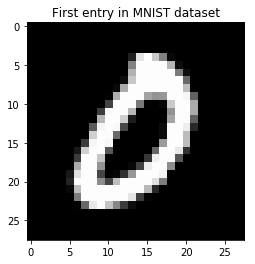

In [7]:
plot_image(trainimages[0])
plt.title("First entry in MNIST dataset")
plt.show()

Mean of all images in training set

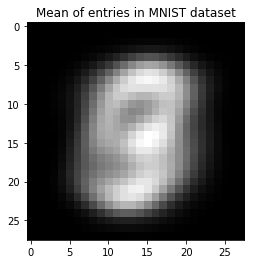

In [8]:
mean = torch.mean(trainimages.float(), dim=0)
plot_image(mean)
plt.title("Mean of entries in MNIST dataset")
plt.show()

Show pixels that are zero for all images in training set as black, pixels that are nonzero for at least one image as white. 

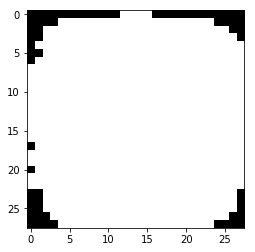

In [9]:
nonzero = torch.gt(torch.sum(trainimages.float(), dim=0), 0.0)
plot_image(nonzero)
plt.show()


Define a function for displaying a stack of images.
imgstack is a list of mxn images 

In [10]:
def montage(imgstack):
    plt.figure()
    width = int(np.ceil(np.sqrt(len(imgstack))))
    height = int(np.floor(np.sqrt(len(imgstack))))
    for i in range(0, len(imgstack)):
        plt.subplot(height, width, i+1)
        plot_image(imgstack[i])
    plt.show()

Show the first 16 train images

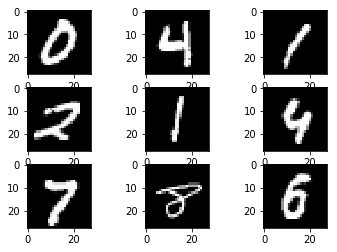

In [11]:
montage(trainimages[0:9])

Display labels of the images above

In [12]:
trainlabels[0:9]


 0
 4
 1
 2
 1
 4
 7
 8
 6
[torch.LongTensor of size 9]

Compute mean of images in each digit class

In [13]:
trainmeans = torch.zeros((10,28,28))
for i in range(10):
    indices = (trainlabels == i).nonzero()[:,0]
    images = trainimages[indices]
    trainmeans[i] = torch.mean(images.float(), dim=0)

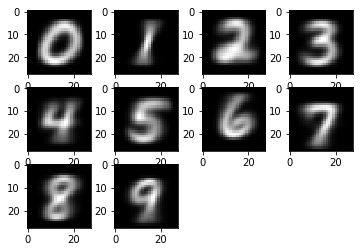

In [14]:
montage([trainmeans[i] for i in range(10)])

Compute distribution over digit classes in training set

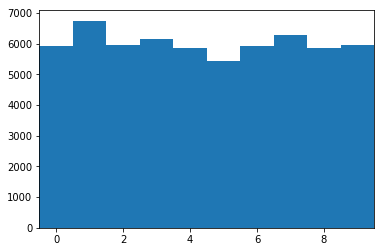

In [15]:
plt.hist(trainlabels.numpy(), bins=[-0.5 + i for i in range(11)])
plt.xlim([-0.5, 9.5])
plt.show()